# Convergence rate of iterative methods for linear systems

In the following, we numerically compute the convergence rate for the Jacobi and Gauss--Seidel methods applied to a two-dimensional Poisson problem with Dirichlet boundary conditions introduced in leture 12 at slide 8. This problems results in a system Matrix $\mathsf{A}$ like shown in slide 11 of the lecture 13, namely

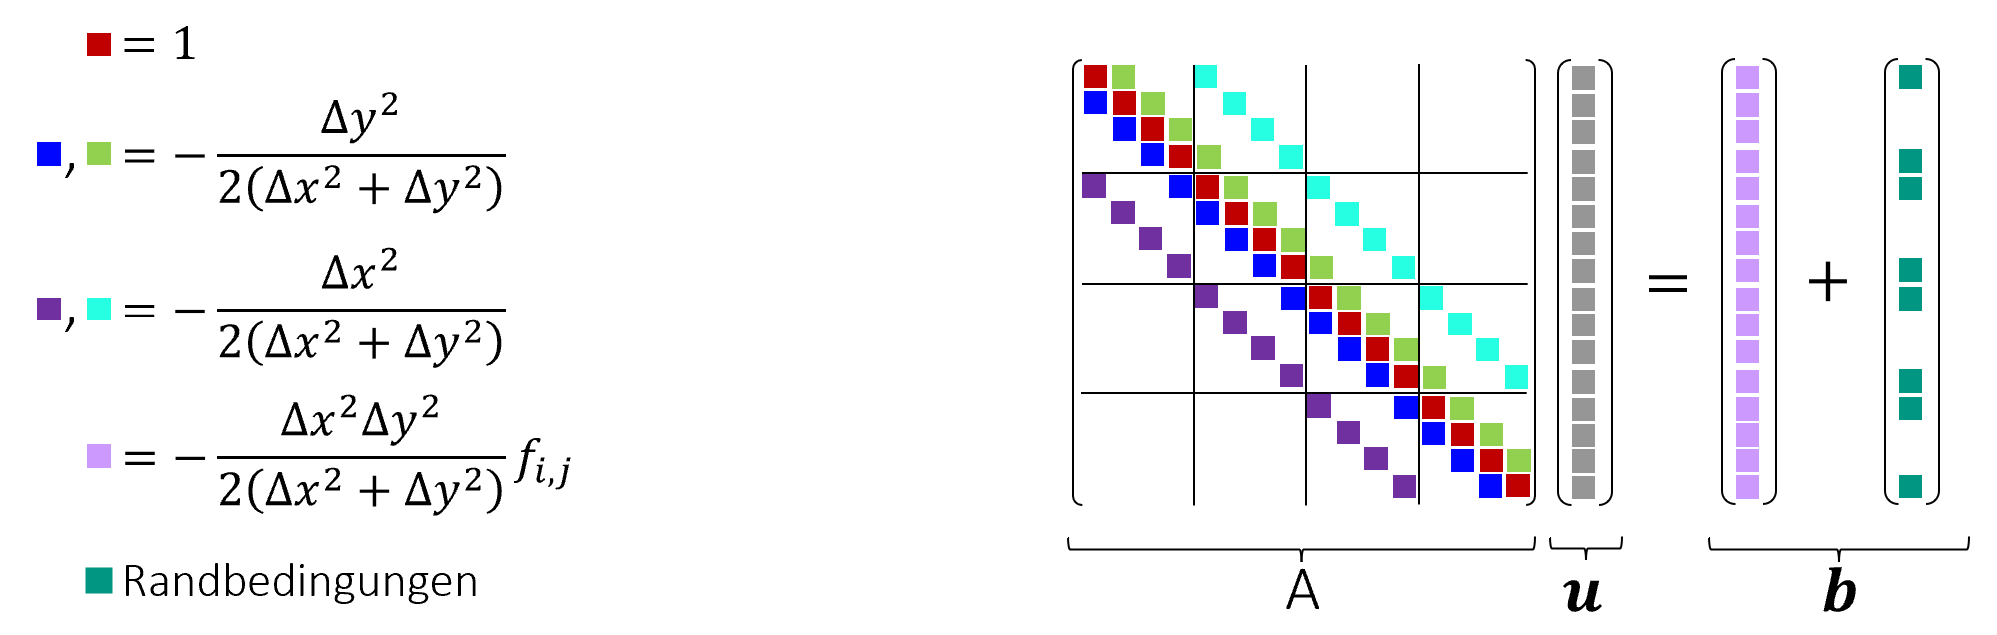

The spatial domain of the solution is $x \in [0, L_x]$ and $y \in [0, L_y]$, which we discretize in $N_x$ and $N_y$ intervals.

In [21]:
# Some preliminary operations: let's import useful modules that we will use later on
import numpy as np                          # module for matrix operations
from matplotlib import pyplot as plt        # module for plotting, the decorator in the following line makes the plots
                                            # appear directly into the notebook instead of an external window
%matplotlib notebook
import scipy.linalg       as lin            # module for linear algebra (we will use it for computing eigenvalues)

Let us first define a function that return the matrix $\mathsf{A}$ as above for different values of domain size $(L_x,L_y)$ and numer of discretisation intervals $(N_x,N_y)$. We also immediately call the function with some random input parameter, to generate one instanec of the matrix $\mathsf{A}$.

In [22]:
# Function to generate the matrix A 
# given the size of the computational domain 
# and the number of intervals with which
# the domain is discretised
def Poisson_Matrix(Lx,Ly,Nx,Ny):

        # The resolution follows
        dx = Lx/(Nx-1)
        dy = Ly/(Ny-1)

        # Overall size of the Matrix A
        NN = Nx*Ny

        # The coefficients of the matrix a
        phi_x = dy**2 / (2*(dx**2 + dy**2)) 
        phi_y = dx**2 / (2*(dx**2 + dy**2)) 

        # Now we can also define the matrix A
        A = (np.diag( np.ones(NN),k=0)             +     
             np.diag( -phi_x*np.ones(NN-1),k=-1)   +
             np.diag( -phi_x*np.ones(NN-1),k= 1)   +
             np.diag( -phi_y*np.ones(NN-Nx),k=-Nx) +
             np.diag( -phi_y*np.ones(NN-Nx),k=+Nx) )
        
        return A, NN
    
# Let's use the function to generate one instance
# of the matrix A with some randomaly-chosen parameters
A, NN = Poisson_Matrix(Lx=1,Ly=1,Nx=10,Ny=10)

<IPython.core.display.Javascript object>


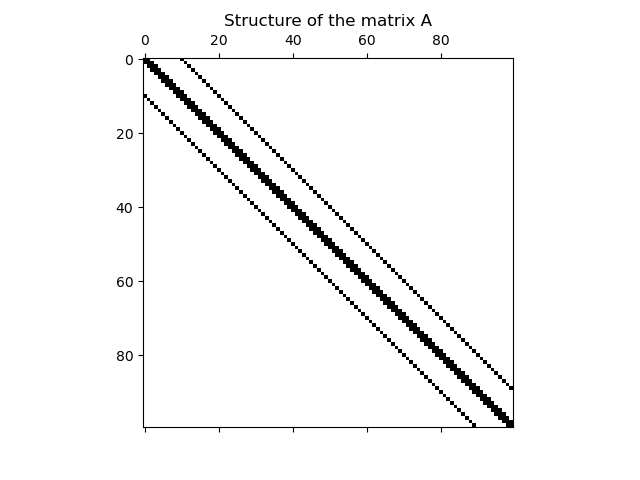

In [23]:
# Let's plot the structure of the matrix A, it should match what we expect
# (a 5-band diagonal structure)
plt.figure()
plt.title('Structure of the matrix A')
plt.spy(A)

Now we are ready to compute the spectral radius and the convergence rate for the Jacobi and Gauss-Seidel methods. 

A general iterative method is defined as 

$$\mathsf{N}\mathbf{u}^{(k)}=\mathsf{P}\mathbf{u}^{(k-1)} + \mathbf{b}$$

where $\mathsf{P}=\mathsf{N}-\mathsf{A}$, and $\mathsf{N}$ is chosen differently according to the method under consideration. In particular

* $\mathsf{N}=\mathsf{I}$ for the Jacobi Method
* $\mathsf{N}=\mathsf{L}$, where $\mathsf{L}$ is the lower traingular part of $\mathsf{A}$ for the Gauss-Seidel Method

The stability of the method is determined by the eigenvalues of the amplification matrix $\mathsf{G=N^{-1}P}$. In particular,  the spectral radius $\rho(\mathsf{G})$ must be smaller than one ($\rho(\mathsf{G})<1$) for the method to converge, where $\rho(\mathsf{G})$ is the absolute value of the largest eigenvalue of $\rho(\mathsf{G})$, i.e. 

$$\rho(\mathsf{G}) = \max_i \left| \lambda_i(\mathsf{G})\right|$$

Once $\rho(\mathsf{G})$ is determined, the convergence rate

$$ R = -\log_{10} [\rho(\mathsf{G})]$$ 

can also be easily determined.

In [24]:
# Jacobi Method: spectral radius for the discretisation parameters chosen above
N = np.eye(NN)
G = lin.inv(N)@(N-A)  # the symbol "@" is the matrix multiplication
sigma = lin.eigvals(G)
rho = np.max(np.abs(sigma))
print('The spectral radius for the Jacobi mehtod is:', rho)

The spectral radius is:  0.9790236154249027


In [25]:
# Gauss-Seidel Methode: spectral radius for the discretisation parameters chosen above
N = np.tril(A)  # this gets the lower triangular matrix of A
G = lin.inv(N)@(N-A)
sigma = lin.eigvals(G)
rho = np.max(np.abs(sigma))
print('The spectral radius for the Gauss-Seidel method is: ', rho)

The spectral radius is:  0.9586615882223767


More interesting is to compute how the spectral radius (and the convergence rate) change for problems of various size. We do this in the following

In [ ]:
# How does the spectral radius change with the problem size?

# Array of Nx=Ny values 
N = np.asarray([5,10,15,20,25,30,35,40,50,60,70])
# Lists where to store the spectral radii for each value of N=Nx=Ny
rho_Jacobi = list()
rho_GaussSeidel = list()
# Loop over all values of N
for iN in N:
    # Jacobi
    A, NN = Poisson_Matrix(Lx=1,Ly=1,Nx=iN,Ny=iN)
    Nmat = np.eye(NN)
    G = lin.inv(Nmat)@(Nmat-A)
    sigma = lin.eigvals(G)
    rho_Jacobi.append(np.max(np.abs(sigma))) 
    # Gauss-Seidel
    Nmat = np.tril(A)
    G = lin.inv(Nmat)@(Nmat-A)
    sigma = lin.eigvals(G)
    rho_GaussSeidel.append(np.max(np.abs(sigma))) 

<IPython.core.display.Javascript object>


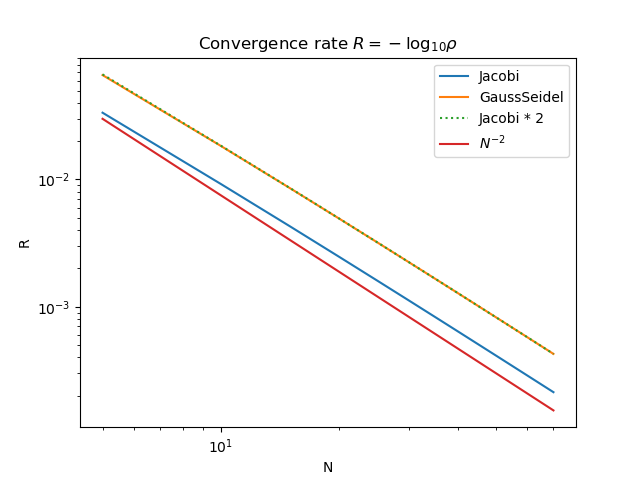

In [41]:
# Now we can plot the convergence rate for different values of problem size
plt.figure()
plt.title(r'Convergence rate $R = -\log_{10} \rho$')
plt.loglog(N,-np.log10(rho_Jacobi), label='Jacobi')
plt.loglog(N,-np.log10(rho_GaussSeidel), label='GaussSeidel')
plt.loglog(N,-2*np.log10(rho_Jacobi), ':', label='Jacobi * 2')
plt.loglog(N,0.75*np.asarray(N)**(-2.0), label=r'$N^{-2}$')
plt.xlabel('N')
plt.ylabel('R')
plt.legend()